In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from matplotlib import pyplot
import astropy.constants
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [3]:
def magnitude(vector):
    return np.sqrt(vector[0] ** 2.0 + vector[1] ** 2.0 + vector[2] ** 2.0)

In [4]:
class Particle(object):
    def __init__(self, initial_position, initial_velocity, mass, number_time_steps):
        self.position = np.zeros((number_time_steps, 3))
        self.position[0] = initial_position
        self.velocity =  np.zeros((number_time_steps, 3))
        self.velocity[0] = initial_velocity
        self.acceleration = np.zeros((number_time_steps, 3))
        self.mass = mass
        
    def update_position(self, t):
        self.position[t] = self.position[t - 1]
        self.position[t] += self.velocity[t - 1] * delta_t
        self.position[t] += 0.5 * self.acceleration[t - 1] * delta_t * delta_t
    
    def update_velocity(self, t):
        self.velocity[t] = self.velocity[t - 1]
        self.velocity[t] += 0.5 * delta_t * (self.acceleration[t] + self.acceleration[t - 1])
    
    def update_acceleration(self, t, particles):
        for particle in particles:
            if particle != self:
                r12 = particle.vector_to(self.position, t)
                self.acceleration[t] += G * np.asarray(particle.mass) * r12 / magnitude(r12) ** 3.0
        
    def vector_to(self, position1, t):
        return self.position[t] - position1[t]

Distances in Au, Speeds in Au/day, Times in days, DateStamp at 2018-01-01

In [5]:
number_of_time_steps = 1351961
delta_t = 5
G = astropy.constants.G.to('AU**3 / (day**2 * earthMass)').value

In [6]:
A_sun = 4.356559457609672E-03
e_sun = 5.915467101099848E-01
OM_sun = np.deg2rad(1.068996484463902E+02)
w_sun = np.deg2rad(1.664131442629285E+02)
TA_sun = np.deg2rad(1.602852597902436E+02)
i_sun = np.deg2rad(1.963245728840758)
GM_sun = 7.1301670739887768E-13
EA_sun = np.arccos((np.cos(TA_sun) + e_sun) / (1 + e_sun * np.cos(TA_sun)))
r_sun = A_sun * (1 - e_sun * np.cos(EA_sun))
p_sun = A_sun * (1 - e_sun ** 2.0)
h_sun = (GM_sun * A_sun * (1 - e_sun ** 2.0)) ** 0.5
mass_sun = 332946.0487

X_sun = r_sun * (np.cos(OM_sun) * np.cos(w_sun + TA_sun) - np.sin(OM_sun) * np.sin(w_sun + TA_sun) * np.cos(i_sun))
Y_sun = r_sun * (np.sin(OM_sun) * np.cos(w_sun + TA_sun) + np.cos(OM_sun) * np.sin(w_sun + TA_sun) * np.cos(i_sun))
Z_sun = r_sun * (np.sin(i_sun) * np.sin(w_sun + TA_sun))

Xdot_sun = (X_sun * h_sun * e_sun / (r_sun * p_sun)) * np.sin(TA_sun) - (h_sun / r_sun) * (np.cos(OM_sun) * np.sin(w_sun + TA_sun) + np.sin(OM_sun) * np.cos(w_sun + TA_sun) * np.cos(i_sun))
Ydot_sun = (Y_sun * h_sun * e_sun / (r_sun * p_sun)) * np.sin(TA_sun) - (h_sun / r_sun) * (np.sin(OM_sun) * np.sin(w_sun + TA_sun) - np.cos(OM_sun) * np.cos(w_sun + TA_sun) * np.cos(i_sun))
Zdot_sun = (Z_sun * h_sun * e_sun / (r_sun * p_sun)) * np.sin(TA_sun) + (h_sun / r_sun) * np.sin(i_sun) * np.cos(w_sun + TA_sun)

In [7]:
A_jup = 5.194733479265398
e_jup = 4.958343147084019E-02
OM_jup = np.deg2rad(1.005189857268031E+02)
w_jup = np.deg2rad(2.733567610595707E+02)
TA_jup = np.deg2rad(2.043955231409976E+02)
i_jup = np.deg2rad(1.303017628809368)
GM_jup = 2.9546265423765355E-04
EA_jup = np.arccos((np.cos(TA_jup) + e_jup) / (1 + e_jup * np.cos(TA_jup)))
r_jup = A_jup * (1 - e_jup * np.cos(EA_jup))
p_jup = A_jup * (1 - e_jup ** 2.0)
h_jup = (GM_jup * A_jup * (1 - e_jup ** 2.0)) ** 0.5
mass_jup = 317.83

X_jup = r_jup * (np.cos(OM_jup) * np.cos(w_jup + TA_jup) - np.sin(OM_jup) * np.sin(w_jup + TA_jup) * np.cos(i_jup))
Y_jup = r_jup * (np.sin(OM_jup) * np.cos(w_jup + TA_jup) + np.cos(OM_jup) * np.sin(w_jup + TA_jup) * np.cos(i_jup))
Z_jup = r_jup * (np.sin(i_jup) * np.sin(w_jup + TA_jup))

Xdot_jup = (X_jup * h_jup * e_jup / (r_jup * p_jup)) * np.sin(TA_jup) - (h_jup / r_jup) * (np.cos(OM_jup) * np.sin(w_jup + TA_jup) + np.sin(OM_jup) * np.cos(w_jup + TA_jup) * np.cos(i_jup))
Ydot_jup = (Y_jup * h_jup * e_jup / (r_jup * p_jup)) * np.sin(TA_jup) - (h_jup / r_jup) * (np.sin(OM_jup) * np.sin(w_jup + TA_jup) - np.cos(OM_jup) * np.cos(w_jup + TA_jup) * np.cos(i_jup))
Zdot_jup = (Z_jup * h_jup * e_jup / (r_jup * p_jup)) * np.sin(TA_jup) + (h_jup / r_jup) * np.sin(i_jup) * np.cos(w_jup + TA_jup)

In [8]:
A_sat = 9.540353089676781
e_sat = 5.437590051262039E-02
OM_sat = np.deg2rad(1.135890100729469E+02)
w_sat = np.deg2rad(3.390503000185154E+02)
TA_sat = np.deg2rad(1.776139183488646E+02)
i_sat = np.deg2rad(2.487858873948251)
GM_sat = 2.9605561889295168E-04
EA_sat = np.arccos((np.cos(TA_sat) + e_sat) / (1 + e_sat * np.cos(TA_sat)))
r_sat = A_sat * (1 - e_sat * np.cos(EA_sat))
p_sat = A_sat * (1 - e_sat ** 2.0)
h_sat = (GM_sat * A_sat * (1 - e_sat ** 2.0)) ** 0.5
mass_sat = 95.2

X_sat = r_sat * (np.cos(OM_sat) * np.cos(w_sat + TA_sat) - np.sin(OM_sat) * np.sin(w_sat + TA_sat) * np.cos(i_sat))
Y_sat = r_sat * (np.sin(OM_sat) * np.cos(w_sat + TA_sat) + np.cos(OM_sat) * np.sin(w_sat + TA_sat) * np.cos(i_sat))
Z_sat = r_sat * (np.sin(i_sat) * np.sin(w_sat + TA_sat))

Xdot_sat = (X_sat * h_sat * e_sat / (r_sat * p_sat)) * np.sin(TA_sat) - (h_sat / r_sat) * (np.cos(OM_sat) * np.sin(w_sat + TA_sat) + np.sin(OM_sat) * np.cos(w_sat + TA_sat) * np.cos(i_sat))
Ydot_sat = (Y_sat * h_sat * e_sat / (r_sat * p_sat)) * np.sin(TA_sat) - (h_sat / r_sat) * (np.sin(OM_sat) * np.sin(w_sat + TA_sat) - np.cos(OM_sat) * np.cos(w_sat + TA_sat) * np.cos(i_sat))
Zdot_sat = (Z_sat * h_sat * e_sat / (r_sat * p_sat)) * np.sin(TA_sat) + (h_sat / r_sat) * np.sin(i_sat) * np.cos(w_sat + TA_sat)

In [9]:
A_ura = 1.918745485620048E+01
e_ura = 4.736407750306303E-02
OM_ura = np.deg2rad(7.410778339077424E+01)
w_ura = np.deg2rad(9.695767954227739E+01)
TA_ura = np.deg2rad(2.160153946912549E+02)
i_ura = np.deg2rad(7.708167696577191E-01)
GM_ura = 2.9627051986442837E-04
EA_ura = np.arccos((np.cos(TA_ura) + e_ura) / (1 + e_ura * np.cos(TA_ura)))
r_ura = A_ura * (1 - e_ura * np.cos(EA_ura))
p_ura = A_ura * (1 - e_ura ** 2.0)
h_ura = (GM_ura * A_ura * (1 - e_ura ** 2.0)) ** 0.5
mass_ura = 14.5

X_ura = r_ura * (np.cos(OM_ura) * np.cos(w_ura + TA_ura) - np.sin(OM_ura) * np.sin(w_ura + TA_ura) * np.cos(i_ura))
Y_ura = r_ura * (np.sin(OM_ura) * np.cos(w_ura + TA_ura) + np.cos(OM_ura) * np.sin(w_ura + TA_ura) * np.cos(i_ura))
Z_ura = r_ura * (np.sin(i_ura) * np.sin(w_ura + TA_ura))

Xdot_ura = (X_ura * h_ura * e_ura / (r_ura * p_ura)) * np.sin(TA_ura) - (h_ura / r_ura) * (np.cos(OM_ura) * np.sin(w_ura + TA_ura) + np.sin(OM_ura) * np.cos(w_ura + TA_ura) * np.cos(i_ura))
Ydot_ura = (Y_ura * h_ura * e_ura / (r_ura * p_ura)) * np.sin(TA_ura) - (h_ura / r_ura) * (np.sin(OM_ura) * np.sin(w_ura + TA_ura) - np.cos(OM_ura) * np.cos(w_ura + TA_ura) * np.cos(i_ura))
Zdot_ura = (Z_ura * h_ura * e_ura / (r_ura * p_ura)) * np.sin(TA_ura) + (h_ura / r_ura) * np.sin(i_ura) * np.cos(w_ura + TA_ura)

In [10]:
A_nep = 3.007517699418755E+01
e_nep = 8.661000108355786E-03
OM_nep = np.deg2rad(1.318937114556519E+02)
w_nep = np.deg2rad(2.718199079505096E+02)
TA_nep = np.deg2rad(2.996229007728440E+02)
i_nep = np.deg2rad(1.775829639062517)
GM_nep = 2.9626355610476072E-04
EA_nep = np.arccos((np.cos(TA_nep) + e_nep) / (1 + e_nep * np.cos(TA_nep)))
r_nep = A_nep * (1 - e_nep * np.cos(EA_nep))
p_nep = A_nep * (1 - e_nep ** 2.0)
h_nep = (GM_nep * A_nep * (1 - e_nep ** 2.0)) ** 0.5
mass_nep = 17.1

X_nep = r_nep * (np.cos(OM_nep) * np.cos(w_nep + TA_nep) - np.sin(OM_nep) * np.sin(w_nep + TA_nep) * np.cos(i_nep))
Y_nep = r_nep * (np.sin(OM_nep) * np.cos(w_nep + TA_nep) + np.cos(OM_nep) * np.sin(w_nep + TA_nep) * np.cos(i_nep))
Z_nep = r_nep * (np.sin(i_nep) * np.sin(w_nep + TA_nep))

Xdot_nep = (X_nep * h_nep * e_nep / (r_nep * p_nep)) * np.sin(TA_nep) - (h_nep / r_nep) * (np.cos(OM_nep) * np.sin(w_nep + TA_nep) + np.sin(OM_nep) * np.cos(w_nep + TA_nep) * np.cos(i_nep))
Ydot_nep = (Y_nep * h_nep * e_nep / (r_nep * p_nep)) * np.sin(TA_nep) - (h_nep / r_nep) * (np.sin(OM_nep) * np.sin(w_nep + TA_nep) - np.cos(OM_nep) * np.cos(w_nep + TA_nep) * np.cos(i_nep))
Zdot_nep = (Z_nep * h_nep * e_nep / (r_nep * p_nep)) * np.sin(TA_nep) + (h_nep / r_nep) * np.sin(i_nep) * np.cos(w_nep + TA_nep)

In [11]:
#most values obtained from Planet 9's Wikipedia page, highly hypothetical/estimated
A_pl9 = 7.0E+02
e_pl9 = 6.0E-01
OM_pl9 = np.deg2rad(0)
w_pl9 = np.deg2rad(1.50E+02)
TA_pl9 = np.deg2rad(2.457624418536339E+01) #value from a random TNO at 2018-01-01
i_pl9 = np.deg2rad(3.0E+01)
GM_pl9 = 2.9630927492415936E-04 #value from a random TNO at 2018-01-01 (relatively the same for all objects beyond Jupiter)
EA_pl9 = np.arccos((np.cos(TA_pl9) + e_pl9) / (1 + e_pl9 * np.cos(TA_pl9)))
r_pl9 = A_pl9 * (1 - e_pl9 * np.cos(EA_pl9))
p_pl9 = A_pl9 * (1 - e_pl9 ** 2.0)
h_pl9 = (GM_pl9 * A_pl9 * (1 - e_pl9 ** 2.0)) ** 0.5
mass_pl9 = 10.0

X_pl9 = r_pl9 * (np.cos(OM_pl9) * np.cos(w_pl9 + TA_pl9) - np.sin(OM_pl9) * np.sin(w_pl9 + TA_pl9) * np.cos(i_pl9))
Y_pl9 = r_pl9 * (np.sin(OM_pl9) * np.cos(w_pl9 + TA_pl9) + np.cos(OM_pl9) * np.sin(w_pl9 + TA_pl9) * np.cos(i_pl9))
Z_pl9 = r_pl9 * (np.sin(i_pl9) * np.sin(w_pl9 + TA_pl9))

Xdot_pl9 = (X_pl9 * h_pl9 * e_pl9 / (r_pl9 * p_pl9)) * np.sin(TA_pl9) - (h_pl9 / r_pl9) * (np.cos(OM_pl9) * np.sin(w_pl9 + TA_pl9) + np.sin(OM_pl9) * np.cos(w_pl9 + TA_pl9) * np.cos(i_pl9))
Ydot_pl9 = (Y_pl9 * h_pl9 * e_pl9 / (r_pl9 * p_pl9)) * np.sin(TA_pl9) - (h_pl9 / r_pl9) * (np.sin(OM_pl9) * np.sin(w_pl9 + TA_pl9) - np.cos(OM_pl9) * np.cos(w_pl9 + TA_pl9) * np.cos(i_pl9))
Zdot_pl9 = (Z_pl9 * h_pl9 * e_pl9 / (r_pl9 * p_pl9)) * np.sin(TA_pl9) + (h_pl9 / r_pl9) * np.sin(i_pl9) * np.cos(w_pl9 + TA_pl9)

In [12]:
sun = Particle([X_sun, Y_sun, Z_sun], [Xdot_sun, Ydot_sun, Zdot_sun], mass_sun, number_of_time_steps)

jupiter = Particle([X_jup, Y_jup, Z_jup], [Xdot_jup, Ydot_jup, Zdot_jup], mass_jup, number_of_time_steps)

saturn = Particle([X_sat, Y_sat, Z_sat], [Xdot_sat, Ydot_sat, Zdot_sat], mass_sat, number_of_time_steps)

uranus = Particle([X_ura, Y_ura, Z_ura], [Xdot_ura, Ydot_ura, Zdot_ura], mass_ura, number_of_time_steps)

neptune = Particle([X_nep, Y_nep, Z_nep], [Xdot_nep, Ydot_nep, Zdot_nep], mass_nep, number_of_time_steps)

planet9 = Particle([X_pl9, Y_pl9, Z_pl9], [Xdot_pl9, Ydot_pl9, Zdot_pl9], mass_pl9, number_of_time_steps)

particles = [sun, jupiter, saturn, uranus, neptune, planet9]

In [13]:
for particle in particles:
    particle.update_acceleration(0, particles)

In [14]:
for t in np.arange(1, number_of_time_steps):
    for particle in particles:
        particle.update_position(t)
    for particle in particles:
        particle.update_acceleration(t, particles)
    for particle in particles:
        particle.update_velocity(t)

<IPython.core.display.Javascript object>


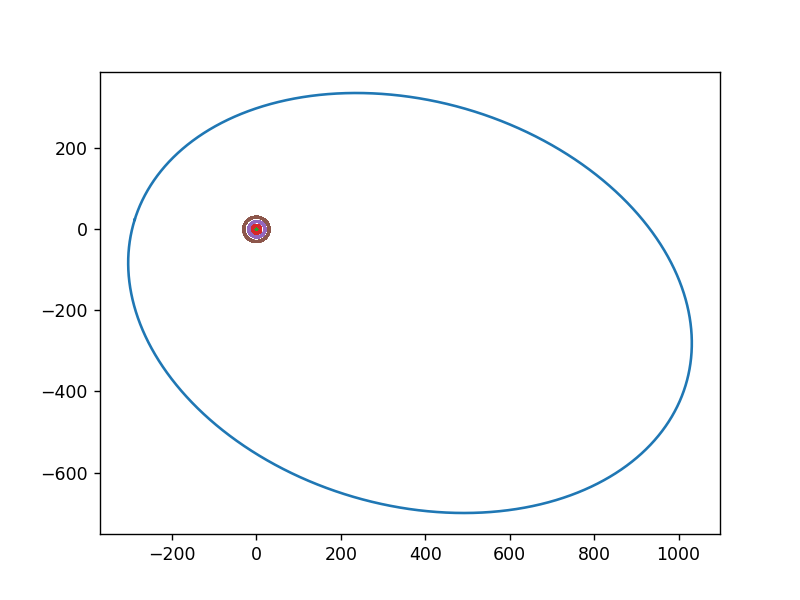

In [15]:
pyplot.plot(planet9.position[:, 0], planet9.position[:, 1])
pyplot.plot(sun.position[:, 0], sun.position[:, 1])
pyplot.plot(jupiter.position[:, 0], jupiter.position[:, 1])
pyplot.plot(saturn.position[:, 0], saturn.position[:, 1])
pyplot.plot(uranus.position[:, 0], uranus.position[:, 1])
pyplot.plot(neptune.position[:, 0], neptune.position[:, 1])

<IPython.core.display.Javascript object>


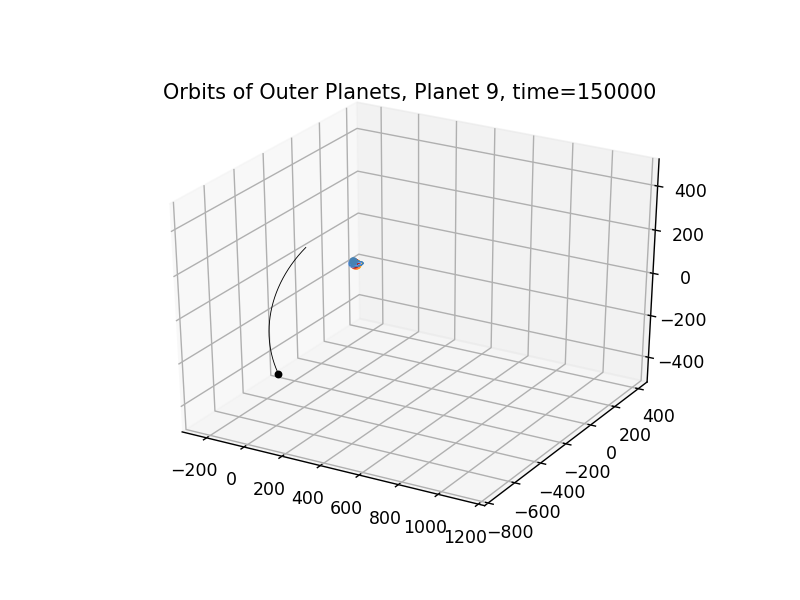

In [26]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('Orbits of Outer Planets, Planet 9')
ax.set_xlim(-300.0, 1200.0)
ax.set_ylim(-800.0, 450.0)
ax.set_zlim(-500, 500)

sun_plot, = ax.plot([X_sun], [Y_sun], [Z_sun], linestyle="", marker="o", markersize=5, color='orange')
sun_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25)
jupiter_plot, = ax.plot([X_jup], [Y_jup], [Z_jup], linestyle="", marker="o", markersize=5, color='coral')
jupiter_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='coral')
saturn_plot, = ax.plot([X_sat], [Y_sat], [Z_sat], linestyle="", marker="o", markersize=5, color='brown')
saturn_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='brown')
uranus_plot, = ax.plot([X_ura], [Y_ura], [Z_ura], linestyle="", marker="o", markersize=4, color='cornflowerblue')
uranus_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='cornflowerblue')
neptune_plot, = ax.plot([X_nep], [Y_nep], [Z_nep], linestyle="", marker="o", markersize=4, color='steelblue')
neptune_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.25, color='steelblue')
planet9_plot, = ax.plot([X_pl9], [Y_pl9], [Z_pl9], linestyle="", marker="o", markersize=3.5, color='black')
planet9_orbit_plot, = ax.plot(np.ones(10), np.zeros(10), np.zeros(10), linestyle="-", linewidth=0.5, color='black')

def update_graph(num):
    sun_plot.set_data([sun.position[num, 0]], [sun.position[num, 1]])
    sun_plot.set_3d_properties([sun.position[num, 2]])
    sun_orbit_plot.set_data(sun.position[0:num:1, 0], sun.position[0:num:1, 1])
    sun_orbit_plot.set_3d_properties(sun.position[0:num:1, 2])
    jupiter_plot.set_data([jupiter.position[num, 0]], [jupiter.position[num, 1]])
    jupiter_plot.set_3d_properties([jupiter.position[num, 2]])
    jupiter_orbit_plot.set_data(jupiter.position[0:num:1, 0], jupiter.position[0:num:1, 1])
    jupiter_orbit_plot.set_3d_properties(jupiter.position[0:num:1, 2])
    saturn_plot.set_data([saturn.position[num, 0]], [saturn.position[num, 1]])
    saturn_plot.set_3d_properties([saturn.position[num, 2]])
    saturn_orbit_plot.set_data(saturn.position[0:num:1, 0], saturn.position[0:num:1, 1])
    saturn_orbit_plot.set_3d_properties(saturn.position[0:num:1, 2])
    uranus_plot.set_data([uranus.position[num, 0]], [uranus.position[num, 1]])
    uranus_plot.set_3d_properties([uranus.position[num, 2]])
    uranus_orbit_plot.set_data(uranus.position[0:num:1, 0], uranus.position[0:num:1, 1])
    uranus_orbit_plot.set_3d_properties(uranus.position[0:num:1, 2])
    neptune_plot.set_data([neptune.position[num, 0]], [neptune.position[num, 1]])
    neptune_plot.set_3d_properties([neptune.position[num, 2]])
    neptune_orbit_plot.set_data(neptune.position[0:num:1, 0], neptune.position[0:num:1, 1])
    neptune_orbit_plot.set_3d_properties(neptune.position[0:num:1, 2])
    planet9_plot.set_data([planet9.position[num, 0]], [planet9.position[num, 1]])
    planet9_plot.set_3d_properties([planet9.position[num, 2]])
    planet9_orbit_plot.set_data(planet9.position[0:num:1, 0], planet9.position[0:num:1, 1])
    planet9_orbit_plot.set_3d_properties(planet9.position[0:num:1, 2])
    title.set_text('Orbits of Outer Planets, Planet 9, time={}'.format(num))
    return title, sun_plot, sun_orbit_plot, jupiter_plot, jupiter_orbit_plot, saturn_plot, saturn_orbit_plot, uranus_plot, uranus_orbit_plot, neptune_plot, neptune_orbit_plot, planet9_plot, planet9_orbit_plot,

FuncAnimation(fig, update_graph, range(0, 1351961, 5000), interval=30, blit=True)

In [27]:
initpos_pl9 = [X_pl9, Y_pl9, Z_pl9]

In [28]:
initpos_pl9

[-288.54891666771834, 23.726164029961424, 13.698307189535441]

In [29]:
np.set_printoptions(threshold=2)

In [30]:
print(planet9.position[1351960])

[-288.54789564   23.76029945   13.68515935]


In [31]:
planet9.position

array([[-288.54891667,   23.72616403,   13.69830719],
       [-288.55052088,   23.72082839,   13.69522665],
       [-288.55212501,   23.71549274,   13.69214612],
       ...,
       [-288.54468178,   23.77097029,   13.69132016],
       [-288.54628876,   23.76563487,   13.68823976],
       [-288.54789564,   23.76029945,   13.68515935]])

In [32]:
1351960 * 5 / 365

18520.0

The average orbital period of Planet 9 is about 18520 Earth years